# 📌 Dynamic Pricing using Q-Learning
This notebook implements **Q-Learning** for optimizing product prices dynamically based on demand and sales.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Grocery_Sales_Final.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Age,Item_Price_Per_Visibility
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,25,1.547065e+04
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,15,2.490900e+03
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,25,8.399607e+03
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,0,1998,2,2,0,732.3800,26,1.820950e+06
4,NCD19,8.93,0,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,37,5.386140e+05


## 🎯 Step 1: Define the Environment
We'll define states, actions, and rewards for the RL model.

In [2]:
# Define state variables: Price, Sales
states = list(zip(df['Item_MRP'], df['Item_Outlet_Sales']))

# Define possible actions: Increase, Decrease, Keep Same
actions = [-5, 0, 5]  # Percentage change in price

# Initialize Q-table
Q_table = defaultdict(lambda: np.zeros(len(actions)))

# Define learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation trade-off

## 🚀 Step 2: Implement Q-Learning Algorithm
The model will iteratively learn an optimal pricing strategy.

In [3]:
# Training the Q-learning model
num_episodes = 1000

for episode in range(num_episodes):
    state = random.choice(states)
    done = False

    while not done:
        # Select action (epsilon-greedy policy)
        if np.random.rand() < epsilon:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(Q_table[state])]

        # Apply action & calculate reward
        new_price = state[0] * (1 + action / 100)
        new_sales = state[1] * (1 - 0.1 * abs(action))  # Assume demand decreases when price increases
        reward = new_sales * new_price  # Revenue

        # Update Q-value
        new_state = (new_price, new_sales)
        Q_table[state][actions.index(action)] += alpha * (reward + gamma * np.max(Q_table[new_state]) - Q_table[state][actions.index(action)])

        # Update state
        state = new_state

        # End episode if sales drop too low
        if new_sales < 100:
            done = True

## 📊 Step 3: Evaluate Pricing Policy
We'll analyze the learned pricing strategy and visualize the results.

In [4]:
# Extract best pricing decisions
best_policy = {state: actions[np.argmax(Q_table[state])] for state in states}

# Convert policy to DataFrame
policy_df = pd.DataFrame(list(best_policy.items()), columns=['State', 'Best Action'])
policy_df.head()

,State,Best Action
0,"(249.8092, 3735.138)",-5
1,"(48.2692, 443.4228)",-5
2,"(141.618, 2097.27)",-5
3,"(182.095, 732.38)",-5
4,"(53.8614, 994.7052)",-5


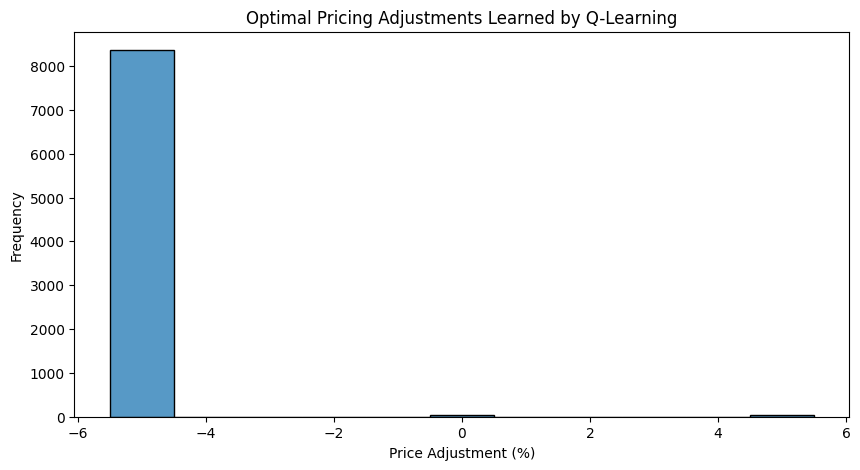

In [5]:
# Visualize price adjustments
plt.figure(figsize=(10, 5))
sns.histplot(policy_df['Best Action'], bins=3, discrete=True)
plt.xlabel('Price Adjustment (%)')
plt.ylabel('Frequency')
plt.title('Optimal Pricing Adjustments Learned by Q-Learning')
plt.show()